
# Assignment No 2a
#### Assignment Credit 
###### *Dr. Sibt ul Hussain*
----
## Goal

Your goal in this assigment is to implement a Gaussian Bayes Classifier.

There are two different flavours of Bayes Rule

- Naive Bayes
- **Gaussian Bayes**


### Instructions
- Do not modify the block with test cases.
- Do not tailor your solution to only pass the test cases. We will use different data for grading so keep your solution generic.
- Passing all the cases means you are in reight direction, but does not ensure 100% marks, there may be some other cases hidden, so carefully read the question statement and implement all the necessory functionality.
- <p style="color:#ff0000">Plagiarism of any kind, (including internet) will lead to zero marks.</p>

#### Libraries
Ther are two additional libraries used which are not included in Anaconda package, nose and seaborn. You can install them using the following commands :
```sh
conda install -c anaconda nose=1.3.7
conda install -c anaconda seaborn=0.7.1
```
Version of different libraries used are listed below:
- Matplotlib **1.5.1**
- Pandas **0.18.1**
- Numpy **1.11.1**
- Scipy **0.17.1**
- Seaborn **0.7.1**

Code for checking version info is present in cell below.

#### Dead Kernal
In case kernel does not connect, and shows a dead kernal meggese in read : 
- Go to Kernal -> Change kernal, and choose any of the available kernels.
- Press ctrl + s and close the tab.
- Open the notebook again and the kernel will connect. If it still does not connect then go to Kernel -> restart.

**Note : ** Accuracies may slightly vary due to randomness in train-text split. 

In [4]:
%pylab inline
import scipy.stats
import pandas as pd
from collections import defaultdict
import seaborn as sns
#many important functions are already written and provided in tools.py 
# please have a look at these functions....
import tools as t


plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
print ("Matplotlib version : ", matplotlib.__version__)
print ("Pandas version : ", pd.__version__)
print ("Numpy version : ", np.__version__)
print ("Scipy version : ", scipy.__version__)
print ("Seaborn version : ", sns.__version__)

Matplotlib version :  3.7.1
Pandas version :  1.5.3
Numpy version :  1.24.3
Scipy version :  1.10.1
Seaborn version :  0.12.2


In [15]:
# YOUR CODE HERE

class GaussianBayes:
    ''' Implements the Gaussian Bayes For Classification... '''
    
    def __init__(self):
        ''' Initialize the class attributes. '''
        self.mean_vectors = None
        self.cov_matrices = None
        self.prior_probs = None
        self.classes = None
    
    def train(self, X, Y):
        ''' Train the multiclass (or Binary) Bayes Rule using the given 
            X [m x n] data matrix and Y labels matrix '''
        
        # Unique classes
        self.classes = np.unique(Y)
        
        # Calculating Prior Probabilities
        self.prior_probs = []
        for c in self.classes:
            prior_prob = np.count_nonzero(Y == c) / len(Y)
            self.prior_probs.append(prior_prob)
        
        # Calculating Mean Vectors and Covariance Matrices for each class
        self.mean_vectors = []
        self.cov_matrices = []
        
        for c in self.classes:
            # Mean vector for each class
            mean_vector = np.mean(X[Y == c], axis=0)
            self.mean_vectors.append(mean_vector)
            
            # Covariance matrix for each class
            cov_matrix = np.cov(X[Y == c], rowvar=False)
            self.cov_matrices.append(cov_matrix)
        
    def gaussian_pdf(self, x, mean, cov):
        ''' Calculates the Gaussian Probability Density Function (PDF) for multivariate data.
            x: Feature vector
            mean: Mean vector of the class
            cov: Covariance matrix of the class
        '''
        d = len(x)
        cov_inv = np.linalg.inv(cov)
        cov_det = np.linalg.det(cov)
        
        # Calculating the Mahalanobis distance
        diff = x - mean
        
        # Multivariate Gaussian PDF
        exponent = -0.5 * np.dot(np.dot(diff.T, cov_inv), diff)
        coefficient = 1.0 / np.sqrt((2 * np.pi) ** d * cov_det)
        return coefficient * np.exp(exponent)
    
    def test(self, X):
        ''' Run the trained classifier on the given set of examples.
            For each example, return the predicted class and its probability.
            
            Input: X of m x d
            Output:
            - pclasses: predicted class of each example
            - probabilities: probabilities of each example belonging to its predicted class
        '''
        pclasses = []
        probabilities = []
        
        for x in X:
            # Calculate the posterior probability for each class
            posteriors = []
            
            for idx, c in enumerate(self.classes):
                # Likelihood: P(X | Ck) using multivariate Gaussian PDF
                likelihood = self.gaussian_pdf(x, self.mean_vectors[idx], self.cov_matrices[idx])
                
                # Posterior: P(Ck | X) = P(X | Ck) * P(Ck)
                posterior = likelihood * self.prior_probs[idx]
                posteriors.append(posterior)
            
            # Normalize posteriors to get probabilities
            total_posterior = sum(posteriors)
            normalized_posteriors = [p / total_posterior for p in posteriors]
            
            # Predicted class is the one with the highest posterior probability
            predicted_class = self.classes[np.argmax(normalized_posteriors)]
            
            pclasses.append(predicted_class)
            probabilities.append(max(normalized_posteriors))
        
        return pclasses, probabilities
    
    def predict(self, X):
        ''' Predict the class for the given examples. '''
        return self.test(X)[0]



In [16]:
data=pd.read_csv('iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print (data.describe())

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


#### Lets Visualize the data

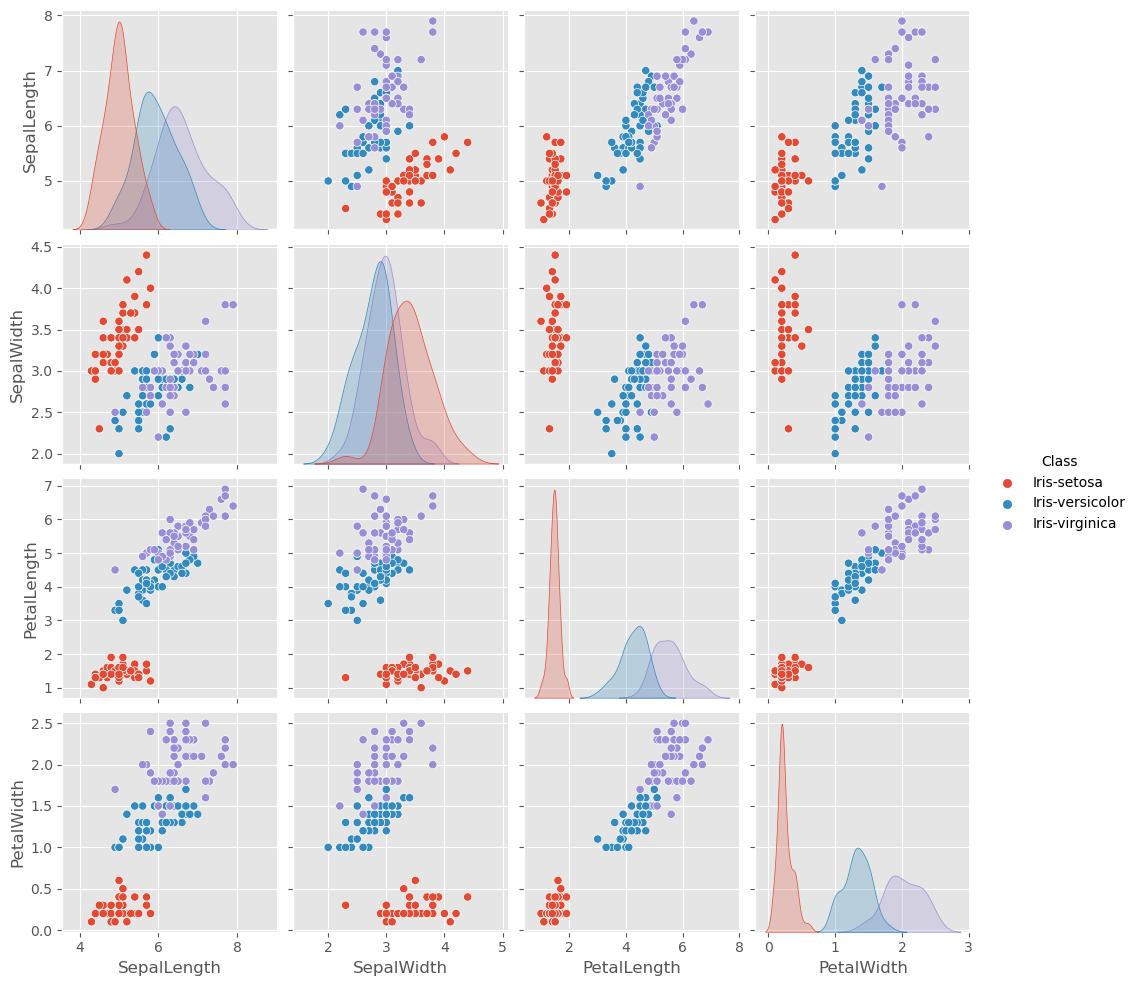

In [17]:
sns.pairplot(data, hue="Class")

#### Get your data in matrix

In [18]:
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print (" Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape)

 Data Set Dimensions= (149, 4)  True Class labels dimensions (149,)


#### Let's Plot the Data

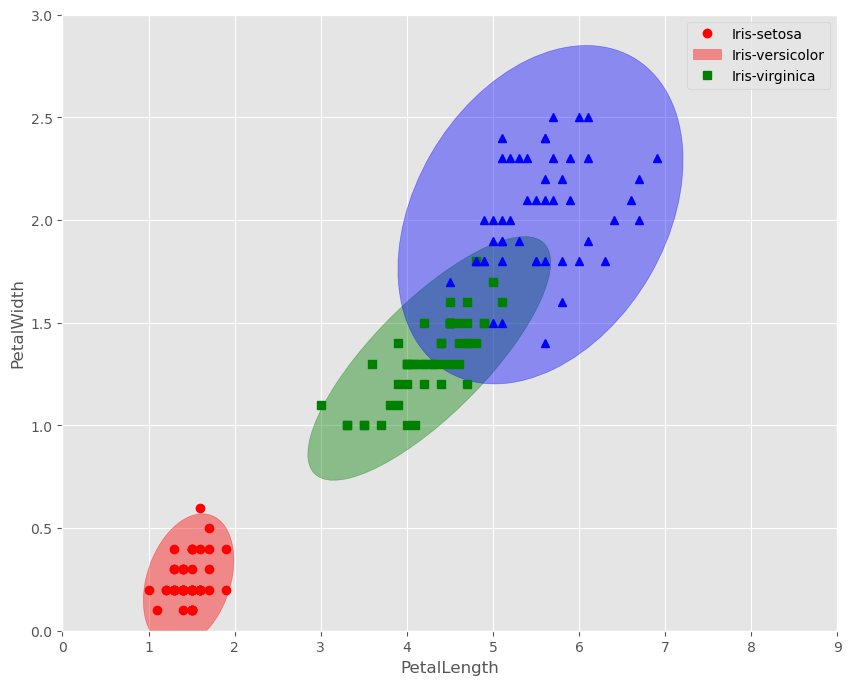

In [19]:
#Lets plot the Complete data, with its covariance matrix...
# Remember seeing is believing
featnames=data.columns
t.plotCov(X[:,2:],Y,labels=featnames.values[2:4])

### Splitting the Data into Training and Testing Sets
There must be a validation set but for this case we are using only two sets, training and validation sets...

In [20]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...

Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print (" Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape) 
print (" Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape)

 Training Data Set Dimensions= (104, 4) Training True Class labels dimensions (104,)
 Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (104,)


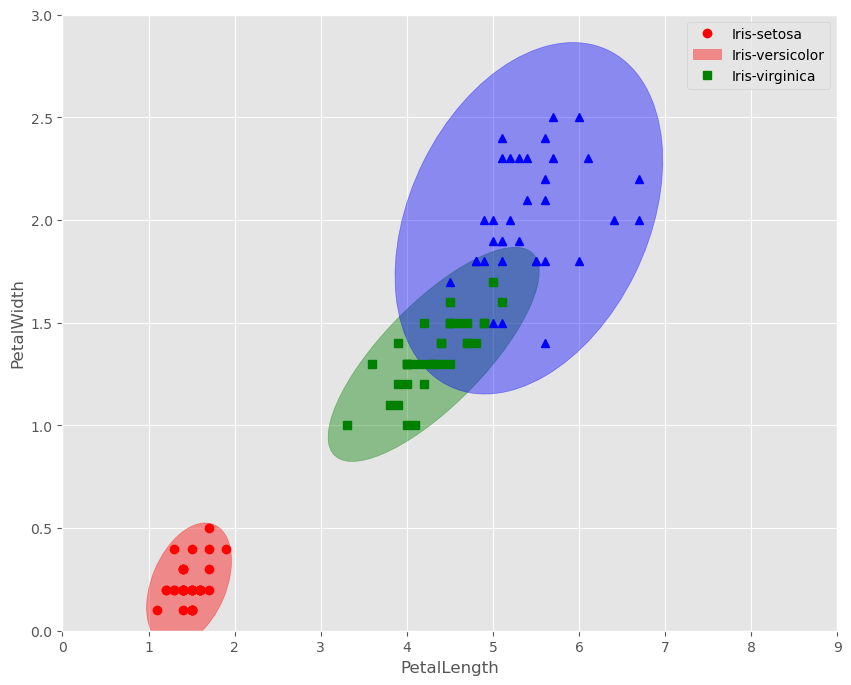

In [21]:
#Lets plot the training data...
t.plotCov(Xtrain[:,2:],Ytrain, labels=featnames.values[2:4])
# so we will be estimating these covariance matrices and means...

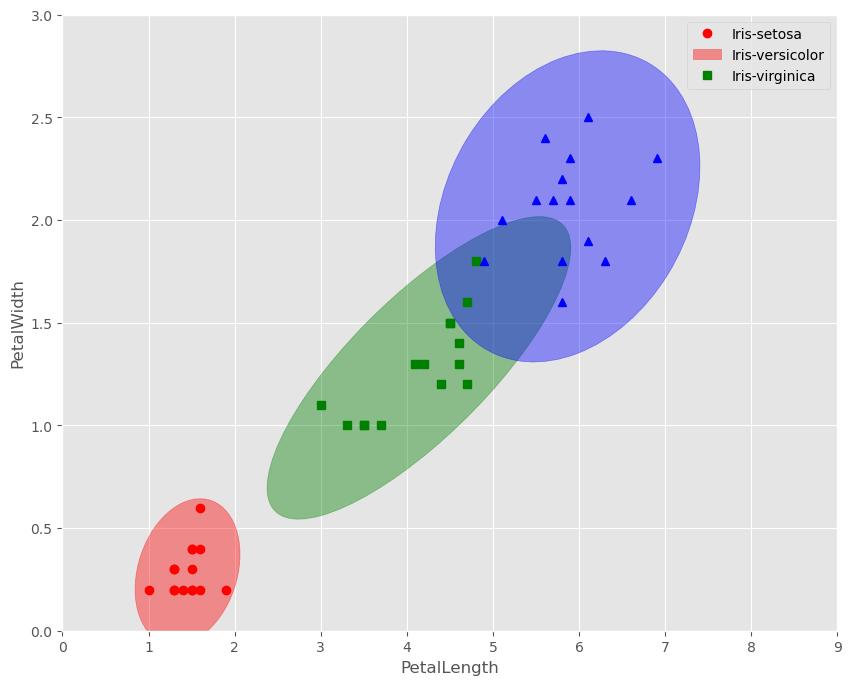

In [22]:
#Lets plot the test data...
t.plotCov(Xtest[:,2:],Ytest,labels=featnames.values[2:4])

Training Time
========
Let's train a Gaussian Bayes, first using two attributes.
- What Two Attributes to use ? Any Guess...

In [23]:
# Lets train a Gaussian Bayes Classifier on Petal Length and Width
gb = GaussianBayes()
gb.train(Xtrain[:,2:],Ytrain)

In [24]:
#Lets test it on the set of unseen examples...

pclasses,res=gb.test(Xtest[:,2:])

Lets see how good we are doing...
==================

In [25]:
#Lets see how good we are doing...
print (pclasses==Ytest)
print (Ytest.shape[0])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
45


In [26]:
# Using Just two attributes, accuracy is 

print (np.sum(pclasses==Ytest))
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

44
Accuracy =  0.9777777777777777


 Plotting the Decision Surface of Training Set... 


/home/muhammad/Desktop/Fall_24/ML_Theory/Assignments/A2/tools.py:691: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


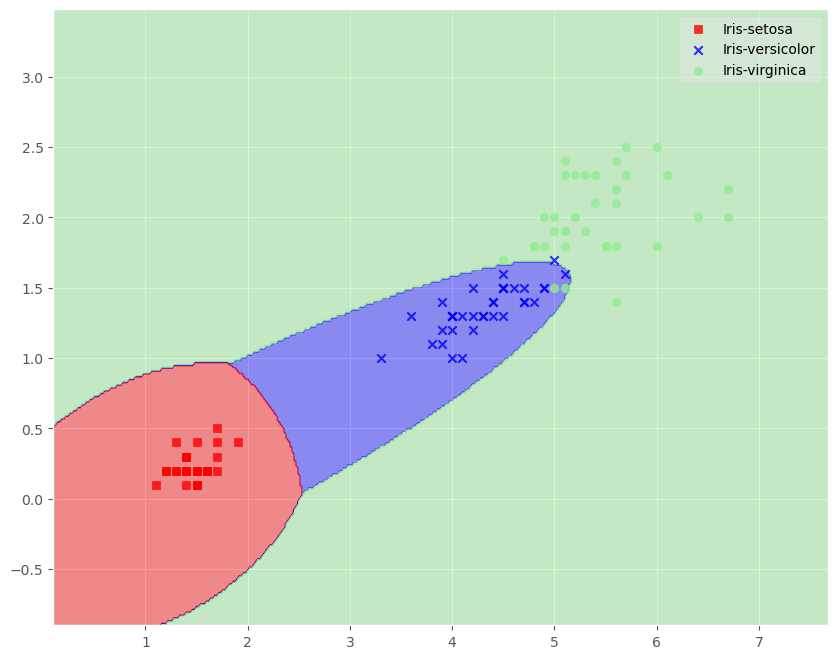

In [27]:
print (" Plotting the Decision Surface of Training Set... ")
t.plot_decision_regions(Xtrain[:,2:],Ytrain,clf=gb, res=0.02, cycle_marker=True, legend=1)

### Test cases for your classifier

In [28]:
from nose.tools import assert_greater_equal, assert_is_not_none
import pandas as pd
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())

data_val = pd.read_csv('./iris_val.data')
data_val.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X_val = np.asarray(data_val[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y_val = np.asarray(data_val['Class'].dropna())

gb_val=GaussianBayes()
gb_val.train(X[:,2:],Y)
pclasses_val, _ = gb_val.test(X_val[:,2:])
acc_val = np.sum(pclasses_val == Y_val) / float(np.array(pclasses_val).shape[0])

assert_greater_equal(acc_val, 0.90, msg="Acc must be greater then 90%")

cls =gb_val.predict(np.array([2,2]).reshape((1,2)))
assert_is_not_none(cls, msg="Predict should work for single example")

print ("All cases passed !")

All cases passed !


## Question: What can you conclude from the above decision Region

# K-Fold Cross Validation

Since our dataset is not too big, to ensure that we are reporting true picture of our classifier, 
we will have to cross validate and report the mean accuracy across the folds to reflect the true 
picture of our classifier.

In [29]:
# Now lets cross validate, and test the result...
nfolds=4
folds=t.generate_folds(X,Y,nfolds)

#now lets train and test on these folds...
totacc=[]
for k in range(nfolds):
    gb=GaussianBayes()
    gb.train(folds[k][0][:,2:],folds[k][1])
    pclasses,res=gb.test(folds[k][2][:,2:])
    acc=np.sum(pclasses==folds[k][3])/float(folds[k][3].shape[0])
    print ("[Info] Fold {} Accuracy = {}".format(k+1, round(acc, 3)))
    totacc.append(round(acc, 2))

print (totacc, 'Mean Accuracy =', round(np.mean(totacc), 2))

Generating CV data for 3 classes
[Info] Fold 1 Accuracy = 0.972
[Info] Fold 2 Accuracy = 0.972
[Info] Fold 3 Accuracy = 0.972
[Info] Fold 4 Accuracy = 0.972
[0.97, 0.97, 0.97, 0.97] Mean Accuracy = 0.97



Hmm Quite Impressive...
--------------------------------

In [30]:
# Lets go and use all the four attributes...
gb.train(Xtrain,Ytrain)

In [31]:
pclasses,res=gb.test(Xtest)

#### Do you expect your Test accuracy to increase or decrease ?

In [32]:
# Using all four attributes, accuracy is 
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

Accuracy =  0.9777777777777777


### Test cases for all four attributes

In [33]:
from nose.tools import assert_greater_equal, assert_is_not_none
import pandas as pd
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())

data_val = pd.read_csv('./iris_val.data')
data_val.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X_val = np.asarray(data_val[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y_val = np.asarray(data_val['Class'].dropna())

gb_val=GaussianBayes()
gb_val.train(X,Y)
pclasses_val, _ = gb_val.test(X_val)
acc_val = np.sum(pclasses_val == Y_val) / float(np.array(pclasses_val).shape[0])

assert_greater_equal(acc_val, 0.90, msg="Acc must be greater then 90%")

cls =gb_val.predict(np.array([2,2,2,2]).reshape((1,4)))
assert_is_not_none(cls, msg="Predict should work for single example")

print ("All cases passed !")

All cases passed !


What can you conclude ?
====================

## Let's change the features... 

In [34]:
features=[0, 1]
gb.train(Xtrain[:,features],Ytrain)
pclasses,res=gb.test(Xtest[:,features])
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

Accuracy =  0.8888888888888888


Remember Features are the important !!
======================

/home/muhammad/Desktop/Fall_24/ML_Theory/Assignments/A2/tools.py:691: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


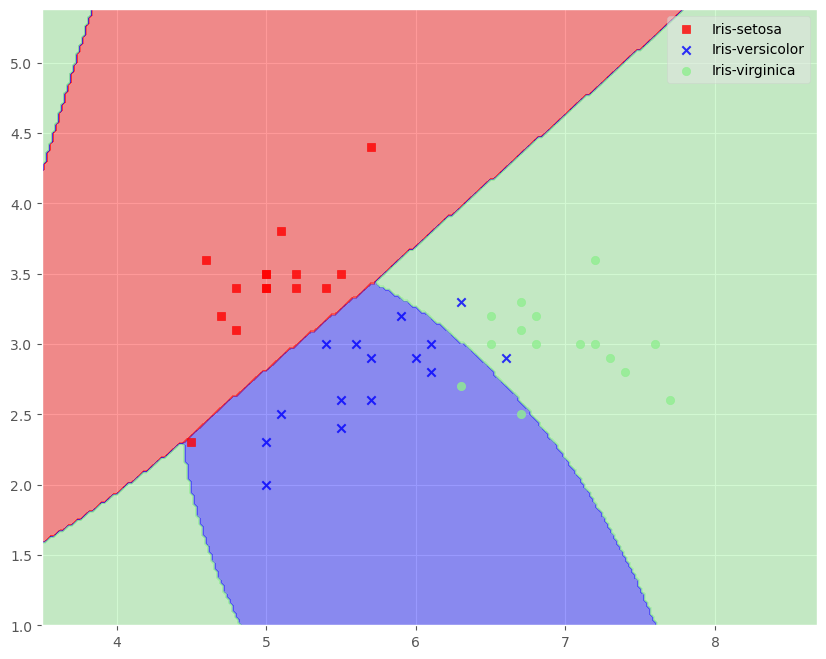

In [35]:
t.plot_decision_regions(Xtest[:,features],Ytest,clf=gb, res=0.02, cycle_marker=True, legend=1)

## Goal: Find the best pair of features (that gives maximum mean cross-validation accuracy) from all the available pairs for the problem in hand

In [36]:
# Step 1: Generate Feature Pairs Manually
def generate_feature_pairs(n_features):
    ''' Manually generate all possible pairs of features '''
    pairs = []
    for i in range(n_features):
        for j in range(i + 1, n_features):
            pairs.append((i, j))
    return pairs

# Step 2: Manually Implement Cross-Validation
def cross_validate(X, Y, feature_pair, n_folds=5):
    ''' Perform cross-validation for the given feature pair '''
    n_samples = X.shape[0]
    fold_size = n_samples // n_folds
    indices = np.arange(n_samples)
    np.random.shuffle(indices)  # Shuffle the data for random splitting
    
    accuracies = []
    
    for i in range(n_folds):
        # Split into train and test sets
        test_idx = indices[i*fold_size:(i+1)*fold_size]
        train_idx = np.setdiff1d(indices, test_idx)
        
        X_train, Y_train = X[train_idx][:, feature_pair], Y[train_idx]
        X_test, Y_test = X[test_idx][:, feature_pair], Y[test_idx]
        
        # Step 3: Train the Gaussian Bayes model
        gb = GaussianBayes()
        gb.train(X_train, Y_train)
        
        # Test the model and calculate accuracy
        Y_pred = gb.predict(X_test)
        accuracy = np.mean(Y_pred == Y_test)
        accuracies.append(accuracy)
    
    # Return mean accuracy across folds
    return np.mean(accuracies)

# Step 4: Find the Best Pair of Features
def find_best_feature_pair(X, Y, n_folds=5):
    ''' Find the best feature pair based on cross-validation accuracy '''
    n_features = X.shape[1]
    feature_pairs = generate_feature_pairs(n_features)
    best_accuracy = 0
    best_pair = None
    
    for pair in feature_pairs:
        mean_accuracy = cross_validate(X, Y, pair, n_folds)
        print(f"Feature pair {pair} has mean accuracy: {mean_accuracy:.2f}")
        
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_pair = pair
    
    return best_pair, best_accuracy

In [37]:
best_pair, best_accuracy = find_best_feature_pair(X, Y, n_folds=5)
print(f"Best feature pair: {best_pair} with accuracy: {best_accuracy:.2f}")

Feature pair (0, 1) has mean accuracy: 0.77
Feature pair (0, 2) has mean accuracy: 0.95
Feature pair (0, 3) has mean accuracy: 0.96
Feature pair (1, 2) has mean accuracy: 0.95
Feature pair (1, 3) has mean accuracy: 0.94
Feature pair (2, 3) has mean accuracy: 0.97
Best feature pair: (2, 3) with accuracy: 0.97
